In [1]:
import pandas as pd

In [2]:
# Headers for the CSV file
column_names = [
    'First Term Gpa',
    'Second Term Gpa',
    'First Language',
    'Funding',
    'School',
    'Fast Track',
    'Coop',
    'Residency',
    'Gender',
    'Prev Education',
    'Age Group',
    'High School Average Mark',
    'Math Score',
    'English Grade',
    'First Year Persistence'
]

# File path
file_path = '../Data/student_data.csv'

In [3]:
# Loading the CSV file into a DataFrame
try:
    df = pd.read_csv(
        file_path,
        header=None,          # Telling pandas there is no header row in the file
        names=column_names,   # Providing the list of correct column names
        na_values='?'         # Telling pandas to treat '?' character as missing (NaN)
    )
    print("DataFrame loaded successfully with correct headers and NaN values!")

    # Displaying the first 5 rows to verify headers and data
    print("\nFirst 5 rows:")
    print(df.head())

    # Displaying DataFrame info to verify column names, counts, and Dtypes
    print("\nDataFrame Info:")
    print(df.info())

except FileNotFoundError:
    print(f"\nError: Could not find the file at {file_path}")
    print("Please ensure the file exists and the path is correct.")
except Exception as e:
    print(f"\nAn error occurred while loading the file: {e}")

DataFrame loaded successfully with correct headers and NaN values!

First 5 rows:
   First Term Gpa  Second Term Gpa  First Language  Funding  School  \
0        0.000000         0.000000             1.0        2       6   
1        2.500000         2.000000             3.0        4       6   
2        4.250000         3.923077             1.0        1       6   
3        3.020833         2.321429             3.0        4       6   
4        4.275000         4.326923             1.0        2       6   

   Fast Track  Coop  Residency  Gender  Prev Education  Age Group  \
0           2     1          1       2             1.0        1.0   
1           1     2          2       2             1.0        3.0   
2           2     1          1       1             2.0        3.0   
3           1     2          2       2             2.0        3.0   
4           1     1          1       1             2.0        3.0   

   High School Average Mark  Math Score  English Grade  First Year Persisten

Doing something interesting now, checking the class balance and imbalance

First Year Persistence
1    0.791928
0    0.208072
Name: proportion, dtype: float64


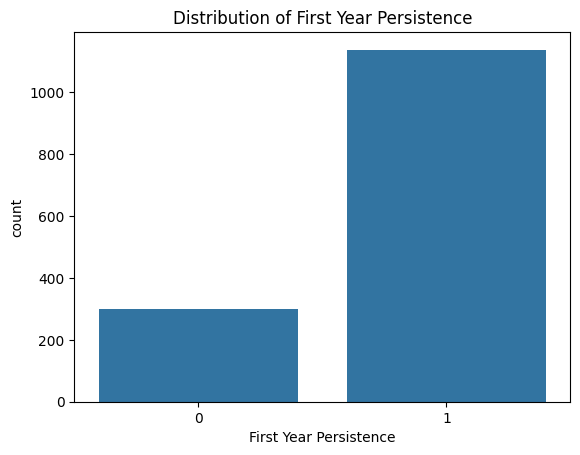

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

print(df['First Year Persistence'].value_counts(normalize=True))
# Visualizing with a countplot (using seaborn library)
sns.countplot(x='First Year Persistence', data=df)
plt.title('Distribution of First Year Persistence')
plt.show()

Another intresting thing to explore, exploring missing values in each column:
Why? If there is a lot of missing values in a column, for example 1000 out of 1500 values are missing, we might drop the column.

Total number of values/rows in each column: 1437
High School Average Mark    743
Math Score                  462
Second Term Gpa             160
First Language              111
English Grade                45
First Term Gpa               17
Prev Education                4
Age Group                     4
Funding                       0
School                        0
Fast Track                    0
Coop                          0
Residency                     0
Gender                        0
First Year Persistence        0
dtype: int64


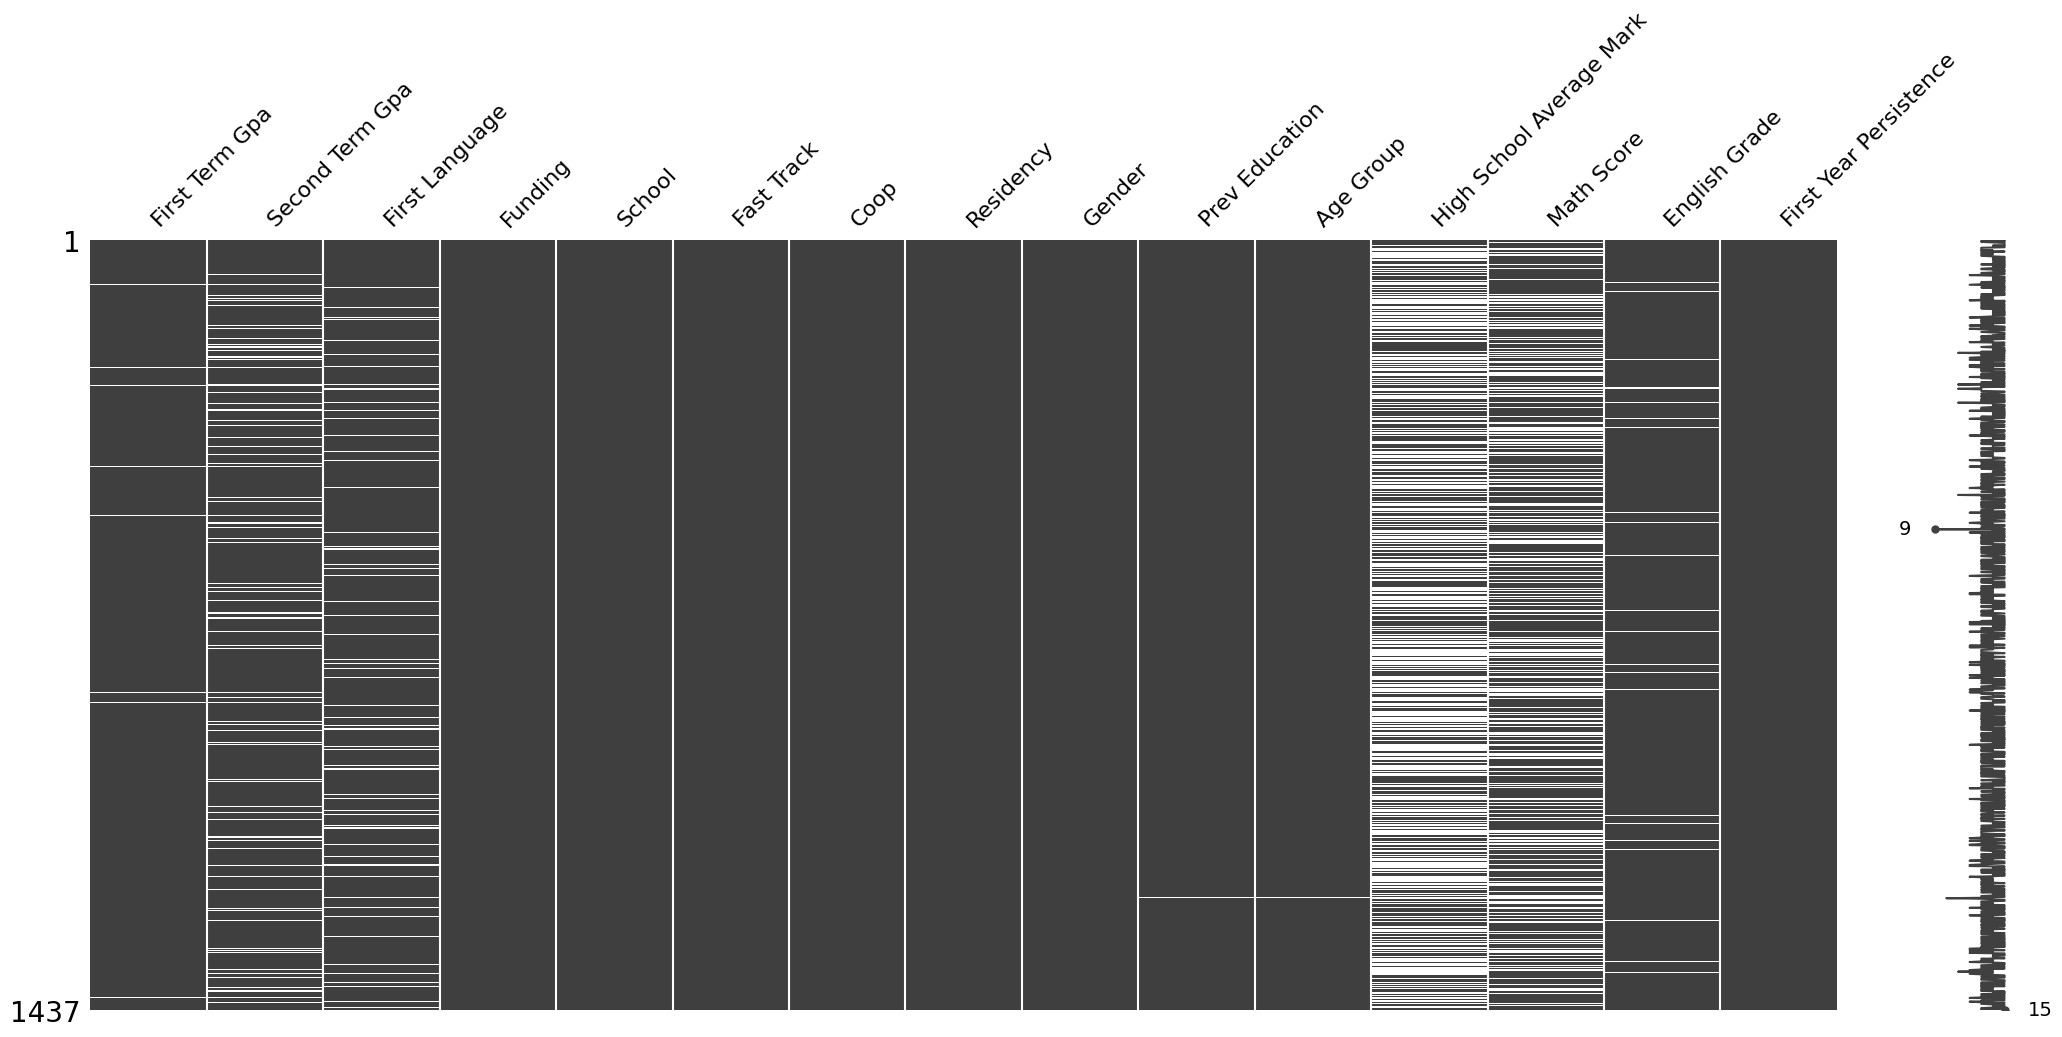

In [6]:
import missingno as msno

# Calculate and print the total number of rows/values once
total_values = len(df)
print(f"Total number of values/rows in each column: {total_values}")

print(df.isnull().sum().sort_values(ascending=False))
# Visualizing missing data patterns (using missingno library)

msno.matrix(df)
plt.show()

In [ ]:
df.describe()
# This is boring as ever, nothing interesting to see here for me

,First Term Gpa,Second Term Gpa,First Language,Funding,School,Fast Track,Coop,Residency,Gender,Prev Education,Age Group,High School Average Mark,Math Score,English Grade,First Year Persistence
count,1420.000000,1277.000000,1326.000000,1437.000000,1437.0,1437.000000,1437.000000,1437.000000,1437.000000,1433.000000,1433.000000,694.000000,975.000000,1392.000000,1437.000000
mean,2.846073,2.820176,1.911011,2.926931,6.0,1.741823,1.695198,1.406402,1.774530,1.274948,2.631542,77.152738,32.557949,8.030172,0.791928
std,1.175098,1.128632,0.994892,1.257658,0.0,0.437784,0.460484,0.491332,0.419699,0.567799,1.421467,12.072760,10.709458,1.716150,0.406070
min,0.000000,0.000000,1.000000,1.000000,6.0,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,17.000000,6.000000,1.000000,0.000000
25%,2.250000,2.260000,1.000000,2.000000,6.0,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,70.000000,23.000000,7.000000,1.000000
50%,3.102632,3.027778,1.000000,2.000000,6.0,2.000000,2.000000,1.000000,2.000000,1.000000,3.000000,77.500000,32.000000,8.000000,1.000000
75%,3.739130,3.680000,3.000000,4.000000,6.0,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,85.000000,43.000000,9.000000,1.000000
max,4.500000,4.500000,3.000000,9.000000,6.0,2.000000,2.000000,2.000000,3.000000,2.000000,8.000000,108.000000,50.000000,10.000000,1.000000



Exploring Categorical Feature Distributions:

--- Value Counts for: School ---
School
6    1437
Name: count, dtype: int64


/var/folders/2y/b9r_0vtx7p7_w6d25jm10h2r0000gn/T/ipykernel_97361/1063415501.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, order=df[column].value_counts().index, palette='viridis')


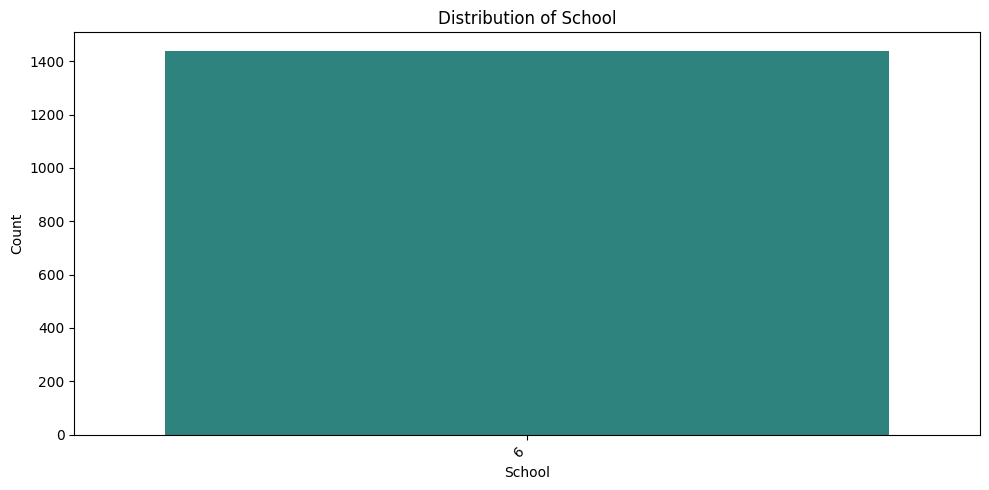

------------------------------------------------------------

--- Value Counts for: Funding ---
Funding
2    796
4    574
8     29
1     27
5     10
9      1
Name: count, dtype: int64


/var/folders/2y/b9r_0vtx7p7_w6d25jm10h2r0000gn/T/ipykernel_97361/1063415501.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, order=df[column].value_counts().index, palette='viridis')


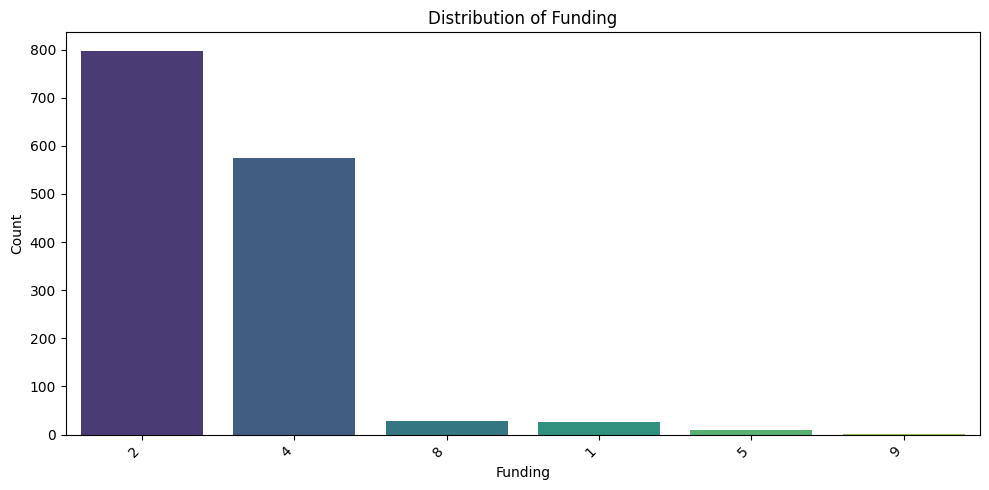

------------------------------------------------------------

--- Value Counts for: First Language ---
First Language
1.0    720
3.0    602
NaN    111
2.0      4
Name: count, dtype: int64


/var/folders/2y/b9r_0vtx7p7_w6d25jm10h2r0000gn/T/ipykernel_97361/1063415501.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, order=df[column].value_counts().index, palette='viridis')


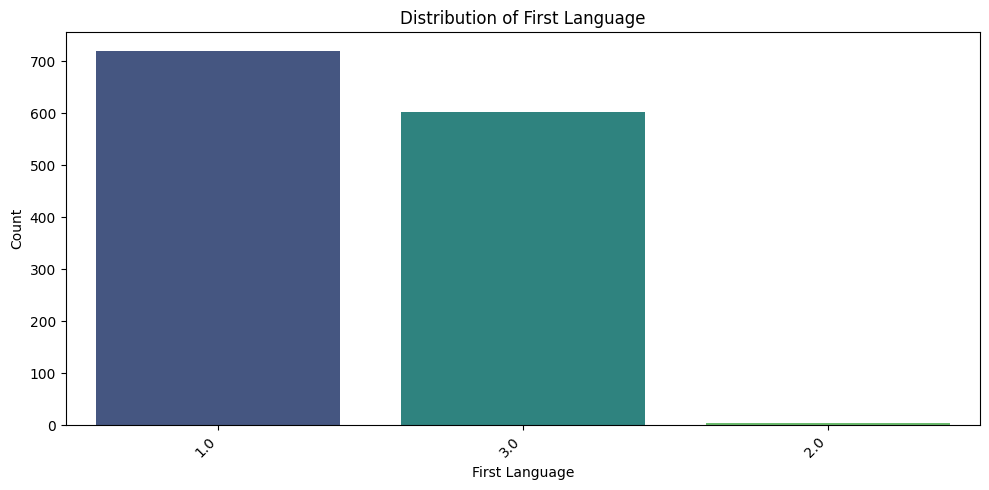

------------------------------------------------------------

--- Value Counts for: Residency ---
Residency
1    853
2    584
Name: count, dtype: int64


/var/folders/2y/b9r_0vtx7p7_w6d25jm10h2r0000gn/T/ipykernel_97361/1063415501.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, order=df[column].value_counts().index, palette='viridis')


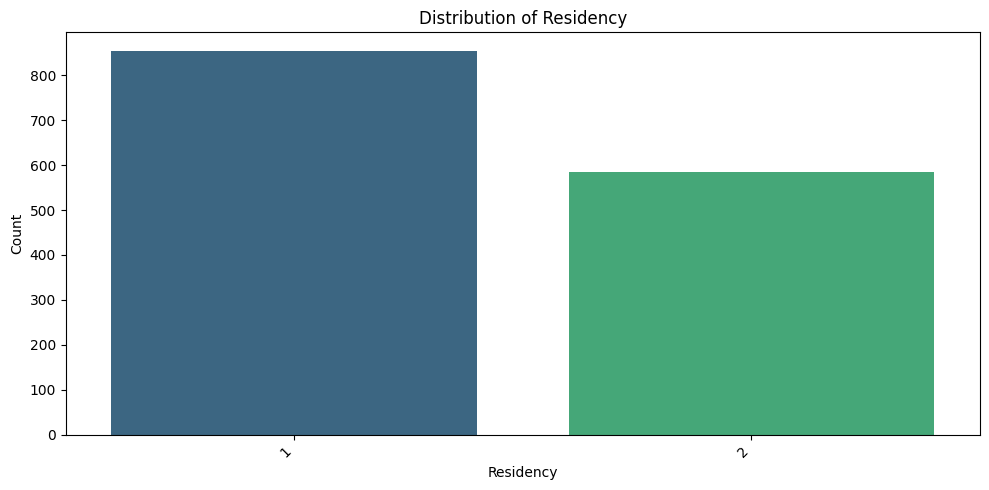

/var/folders/2y/b9r_0vtx7p7_w6d25jm10h2r0000gn/T/ipykernel_97361/1063415501.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, order=df[column].value_counts().index, palette='viridis')


------------------------------------------------------------

--- Value Counts for: Gender ---
Gender
2    1111
1     325
3       1
Name: count, dtype: int64


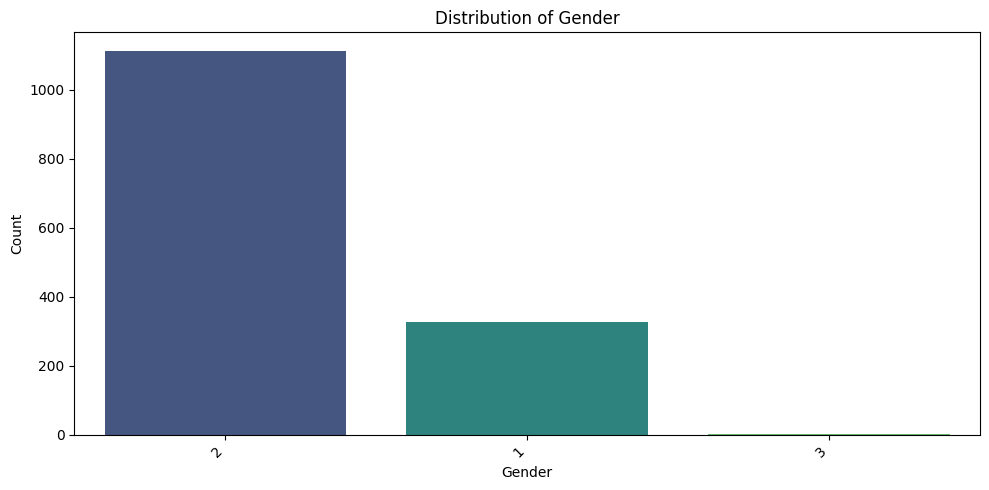

------------------------------------------------------------

--- Value Counts for: Prev Education ---
Prev Education
1.0    863
2.0    482
0.0     88
NaN      4
Name: count, dtype: int64


/var/folders/2y/b9r_0vtx7p7_w6d25jm10h2r0000gn/T/ipykernel_97361/1063415501.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, order=df[column].value_counts().index, palette='viridis')


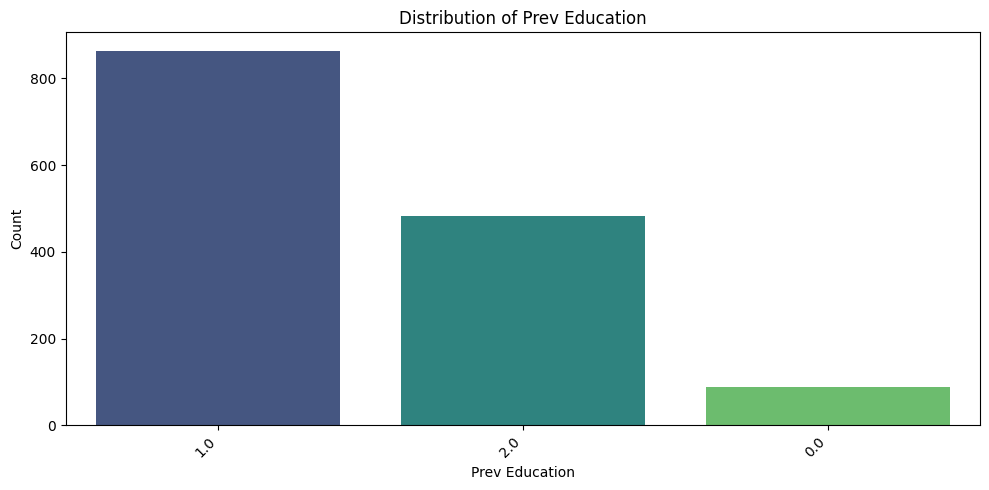

------------------------------------------------------------

--- Value Counts for: Age Group ---
Age Group
3.0    550
1.0    357
2.0    294
4.0    115
5.0     41
7.0     37
6.0     30
8.0      9
NaN      4
Name: count, dtype: int64


/var/folders/2y/b9r_0vtx7p7_w6d25jm10h2r0000gn/T/ipykernel_97361/1063415501.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, order=df[column].value_counts().index, palette='viridis')


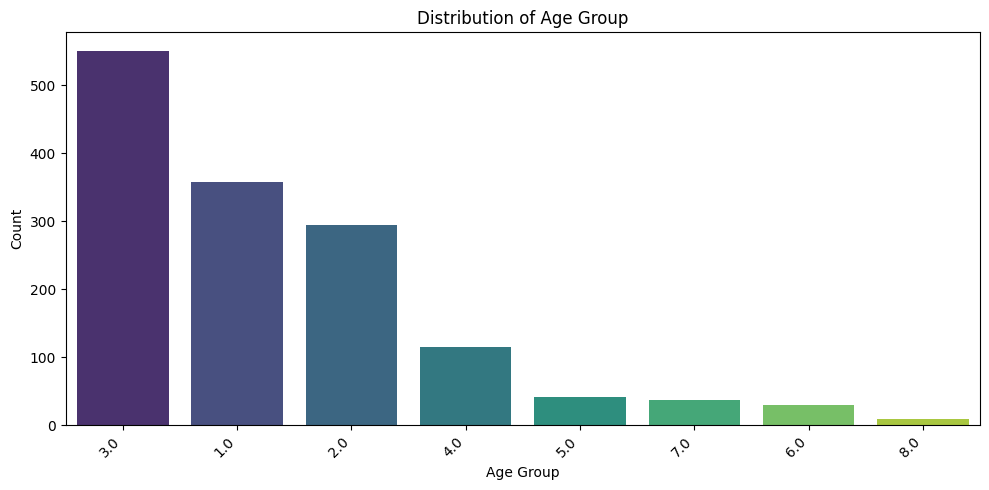

------------------------------------------------------------

--- Value Counts for: English Grade ---
English Grade
9.0     504
8.0     316
7.0     250
10.0    187
4.0      97
NaN      45
3.0      33
1.0       3
2.0       2
Name: count, dtype: int64


/var/folders/2y/b9r_0vtx7p7_w6d25jm10h2r0000gn/T/ipykernel_97361/1063415501.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, order=df[column].value_counts().index, palette='viridis')


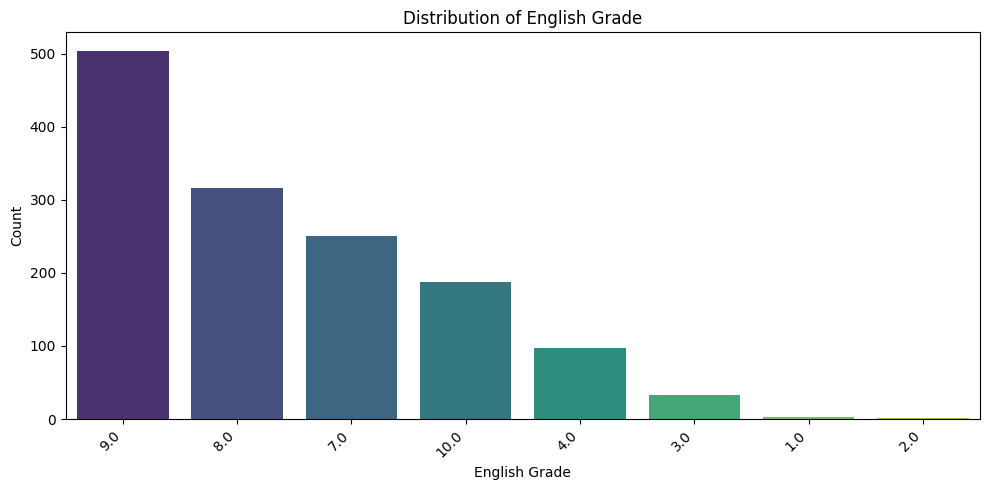

------------------------------------------------------------

--- Value Counts for: Fast Track ---
Fast Track
2    1066
1     371
Name: count, dtype: int64


/var/folders/2y/b9r_0vtx7p7_w6d25jm10h2r0000gn/T/ipykernel_97361/1063415501.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, order=df[column].value_counts().index, palette='viridis')


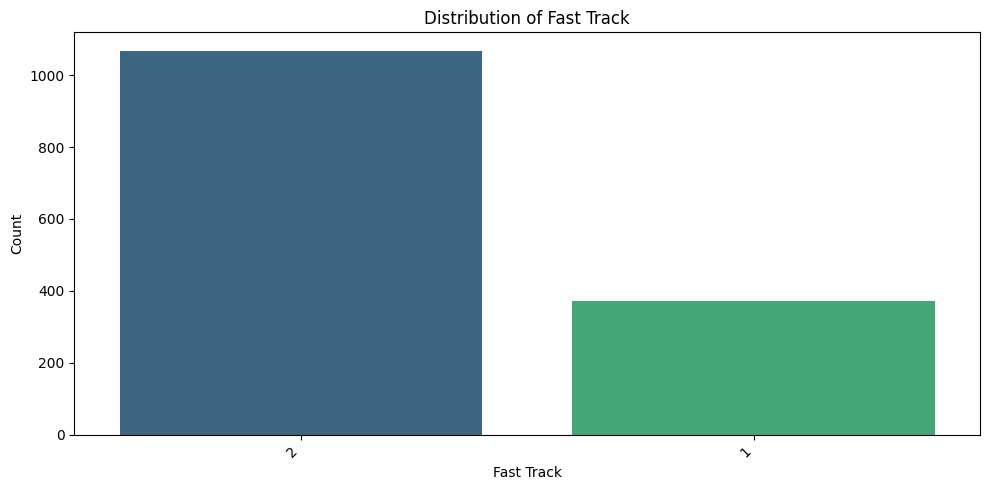

------------------------------------------------------------

--- Value Counts for: Coop ---
Coop
2    999
1    438
Name: count, dtype: int64


/var/folders/2y/b9r_0vtx7p7_w6d25jm10h2r0000gn/T/ipykernel_97361/1063415501.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, order=df[column].value_counts().index, palette='viridis')


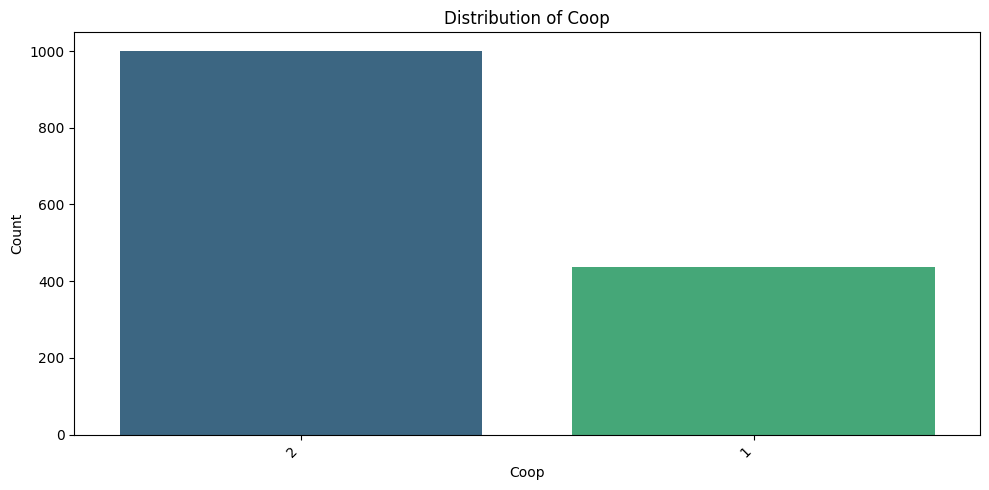

------------------------------------------------------------


In [9]:
# Defines the list of colums to be expoored
# All of them are not numerical, so we can use the same list
columns = [
    'School',
    'Funding',
    'First Language',
    'Residency',
    'Gender',
    'Prev Education',
    'Age Group',
    'English Grade',
    'Fast Track',
    'Coop'
]

print("\nExploring Categorical Feature Distributions:")

# Loop through each specified categorical column
for column in columns:
    # Check if the column exists in the DataFrame before proceeding
    if column in df.columns:
        print(f"\n--- Value Counts for: {column} ---")
        # Print the value counts (frequencies of each category)
        # Dropna=False includes missing values (NaN) in the count if any exist
        print(df[column].value_counts(dropna=False))

        # Create a count plot (bar chart) to visualize the counts
        plt.figure(figsize=(10, 5)) # Adjust figure size as needed
        sns.countplot(x=column, data=df, order=df[column].value_counts().index, palette='viridis')
        plt.title(f'Distribution of {column}')
        plt.xlabel(column) # Set x-axis label
        plt.ylabel('Count') # Set y-axis label
        plt.xticks(rotation=45, ha='right') # Rotate x-axis labels if they overlap
        plt.tight_layout() # Adjust layout to prevent overlap
        plt.show() # Display the plot
        print("-" * 60)
    else:
        print(f"\nColumn '{column}' not found in DataFrame.")


Calculating and Visualizing Numerical Feature Correlations:
Numerical columns selected for correlation:
['First Term Gpa', 'Second Term Gpa', 'First Language', 'Funding', 'School', 'Fast Track', 'Coop', 'Residency', 'Gender', 'Prev Education', 'Age Group', 'High School Average Mark', 'Math Score', 'English Grade', 'First Year Persistence']


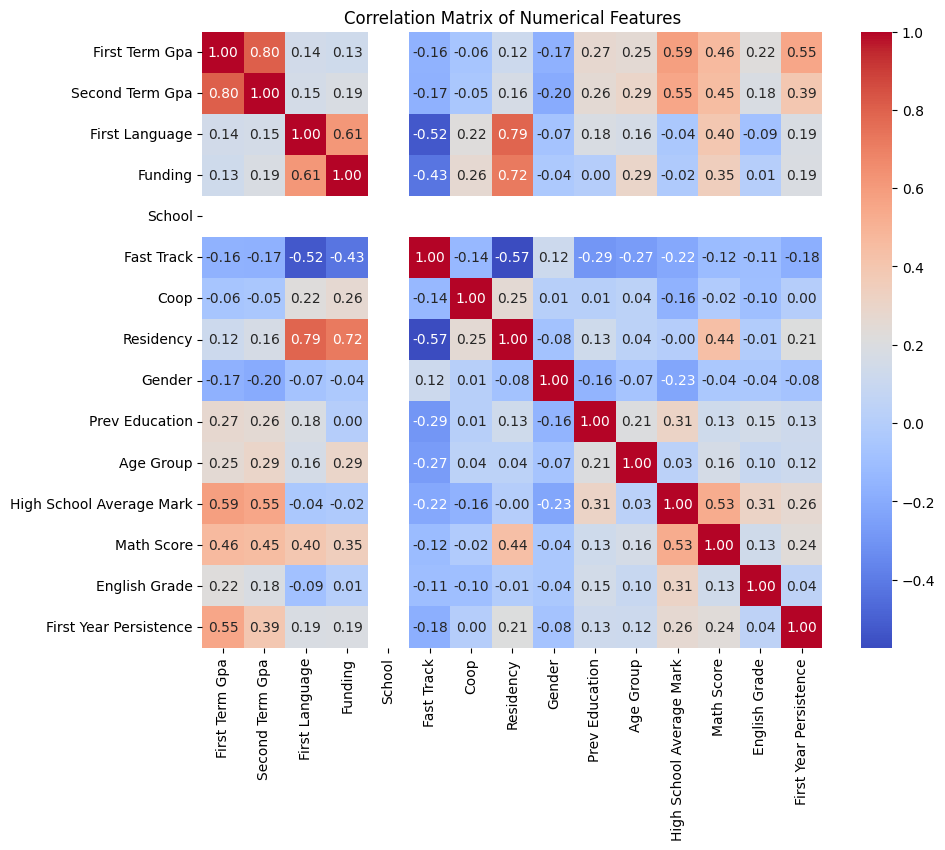


Correlation Matrix Values:
                          First Term Gpa  Second Term Gpa  First Language  \
First Term Gpa                  1.000000         0.804655        0.143743   
Second Term Gpa                 0.804655         1.000000        0.153027   
First Language                  0.143743         0.153027        1.000000   
Funding                         0.132771         0.186497        0.614694   
School                               NaN              NaN             NaN   
Fast Track                     -0.163187        -0.171248       -0.524973   
Coop                           -0.057383        -0.048077        0.222053   
Residency                       0.115207         0.164383        0.786445   
Gender                         -0.172533        -0.202130       -0.073518   
Prev Education                  0.268813         0.255933        0.183225   
Age Group                       0.254235         0.293898        0.162736   
High School Average Mark        0.585731        

In [11]:
import numpy as np
print("\nCalculating and Visualizing Numerical Feature Correlations:")

# 1. Selecting only the columns with numerical data types
numerical_df = df.select_dtypes(include=np.number)

# Printing the columns selected as numerical to verify
print("Numerical columns selected for correlation:")
print(numerical_df.columns.tolist())

# 2. Calculates the correlation matrix
correlation_matrix = numerical_df.corr()

# 3. Visualizes the correlation matrix as a heatmap
plt.figure(figsize=(10, 8)) # Adjust size as needed
sns.heatmap(
    correlation_matrix,
    annot=True,      # Shows the correlation values on the heatmap
    cmap='coolwarm', # Chooses a color map (others exist, e.g., 'viridis', 'plasma')
    fmt=".2f"        # Formats the annotation numbers to 2 decimal places
)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Printing the correlation matrix values if you want to see the numbers directly
print("\nCorrelation Matrix Values:")
print(correlation_matrix)